![Elbit AI Academy](images/ai_acadamy.jpg)

# <center> Final Project </center>

### Project Description

* The project goal is to simulate a real-life ML in a production scenario 
* You will be required to show Data Engineering skills and use the current Best known method for ML production


### What will you need to show?

* Good usage of the tools for ml engineering 
* Ability to understand and monitor your model 
* Data engeneering skils


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Intro</span></span></center></h1> 
Welcome to the [facial expression competition](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge).



<table>
    <tr>
        <td><img src="https://i.ibb.co/B394D0t/12.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/5xV8MZj/40.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/bFgXc43/19.png" width="100%" height="100%"></td>
    </tr>
</table>
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:

| categorie  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

We define a simple CNN model and compare the predicted results with ge given labels.
#

In [1]:
# the notebook should be run twice: 
#running_model = 1
running_model = 2

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;">Libraries</span></center></h1> 
We load some standard libraries and packages of sklearn and keras.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

#second model imports
from tensorflow.keras import datasets, layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import onnxruntime
import onnxmltools
import keras2onnx

import mlflow

np.set_printoptions(suppress=True)


In [3]:
# check the current directory
base_directory = %pwd
base_directory

'C:\\working\\gitos\\keras-onnx'

In [4]:
models_path         = 'models/'
data_v1_path        = 'data_v1/'
data_v2_path        = 'data_v2/'
dvc_repository_path = 'dvc_repository'
raw_data_path       = 'raw_data/'
mlflow_path         = 'mlflow/'

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Configuration</span></span></center></h1> 
Get the configuration for a given month

### Load the configuration for a given month

In [5]:
conf = pd.read_csv(raw_data_path + 'config.csv')
conf

,Model,Train,Module,Accuracy-1,Accuracy-2
0,1,initial_training_data.csv,facial_expression_0,0.249373,0.249373
1,1,data_gathered_at_0.csv,facial_expression_1,0.249373,0.249930
2,1,data_gathered_at_1.csv,facial_expression_2,0.169128,0.169685
3,1,data_gathered_at_2.csv,facial_expression_3,0.249373,0.249373
4,1,data_gathered_at_2_bk.csv,facial_expression_4,0.249373,0.248816
5,1,data_gathered_at_3.csv,facial_expression_5,0.249652,0.249930
6,2,data_gathered_at_4.csv,facial_expression_6,0.185288,0.182781
7,2,data_gathered_at_5.csv,facial_expression_7,0.249373,0.194205
8,2,data_gathered_at_6.csv,facial_expression_8,0.250766,0.250766


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Train Data</span></span></center></h1> 
Load the image data with labels.

In [6]:
train = pd.read_csv(raw_data_path + 'initial_training_data.csv')

In [7]:
train.head()

,Emotion,Pixels,rand
0,0,215 218 222 220 221 226 218 215 216 218 218 21...,7
1,6,145 146 118 26 15 18 16 18 24 38 57 66 71 78 8...,8
2,4,2 3 4 9 9 10 9 10 12 17 20 21 22 22 19 17 15 1...,9
3,3,38 42 35 25 51 33 32 20 29 47 40 28 42 56 61 7...,8
4,2,32 26 37 68 99 112 117 121 123 126 129 135 141...,7


In [8]:
train.drop(columns=['rand'], inplace=True)
train.head(5)

,Emotion,Pixels
0,0,215 218 222 220 221 226 218 215 216 218 218 21...
1,6,145 146 118 26 15 18 16 18 24 38 57 66 71 78 8...
2,4,2 3 4 9 9 10 9 10 12 17 20 21 22 22 19 17 15 1...
3,3,38 42 35 25 51 33 32 20 29 47 40 28 42 56 61 7...
4,2,32 26 37 68 99 112 117 121 123 126 129 135 141...


In [9]:
train['Emotion'].unique()

array([0, 6, 4, 3, 2, 5, 1], dtype=int64)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Validation Data</span></span></center></h1> 
Load the image data with labels.

In [10]:
val = pd.read_csv(raw_data_path + 'validation_test_data.csv')

In [11]:
val.head()

,Emotion,Pixels
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Test Data</span></span></center></h1> 
Load the image data with labels.

In [12]:
test = pd.read_csv(raw_data_path + 'test_data.csv')

In [13]:
test.head()

,Emotion,Pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Functions</span></span></center></h1> 
We define some helper functions for preparing and ploting the data.

In [14]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['Emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'Pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def data_to_tf_data(df):
    image_array, image_label = prepare_data(df)
    images = image_array.reshape((image_array.shape[0], 48, 48, 1))
    images = images.astype('float32')/255
    labels = to_categorical(image_label)
    return images, labels

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(2):
        idx = train[train['Emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = train[train['Emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['Emotion'] = array1.argmax(axis=1)
    df_array2['Emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Overview</span></span></center></h1> 

In [15]:
train['Emotion'].value_counts()

3    91
4    54
6    49
2    48
0    47
5    30
1     2
Name: Emotion, dtype: int64

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Prepare Data</span></span></center></h1> 

In [16]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Define training, validation and test data:

In [17]:
train_image_array, train_image_label = prepare_data(train)
val_image_array,   val_image_label   = prepare_data(val)
test_image_array,  test_image_label  = prepare_data(test)

Reshape and scale the images:

In [18]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images   = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images   = val_images.astype('float32')/255
test_images  = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images  = test_images.astype('float32')/255

Encoding of the target value:

In [19]:
train_labels = to_categorical(train_image_label)
val_labels   = to_categorical(val_image_label)
test_labels  = to_categorical(test_image_label)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Some Examples</span></span></center></h1> 

## All Emotions

In [20]:
#plot_all_emotions()

## Angry

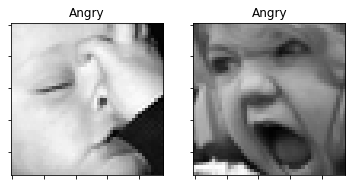

In [21]:
plot_examples(label=0)

## Disgust

In [22]:
#plot_examples(label=1)

## Fear

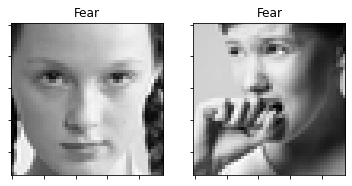

In [23]:
plot_examples(label=2)

## Happy

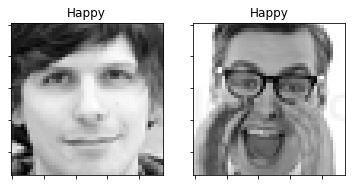

In [24]:
plot_examples(label=3)


## Sad

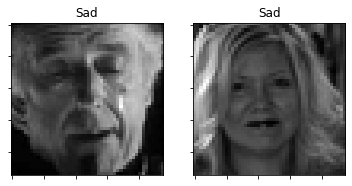

In [25]:
plot_examples(label=4)

## Surprise

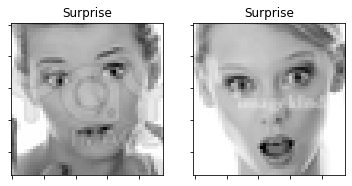

In [26]:
plot_examples(label=5)

## Neutral

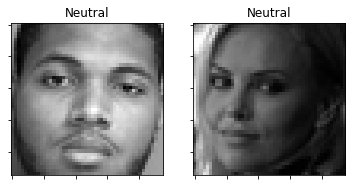

In [27]:
plot_examples(label=6)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Distribution Of Labels</span></span></center></h1> 

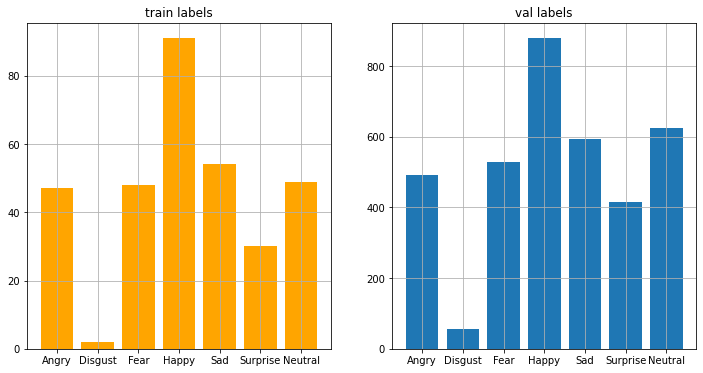

In [28]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Class Weights</span></span></center></h1> 
Calculate the class weights of the label distribution:

In [29]:
class_weight = dict(zip(range(0, 7), (((train['Emotion'].value_counts()).sort_index())/len(train['Emotion'])).tolist()))

In [30]:
class_weight

{0: 0.14641744548286603,
 1: 0.006230529595015576,
 2: 0.14953271028037382,
 3: 0.2834890965732087,
 4: 0.16822429906542055,
 5: 0.09345794392523364,
 6: 0.1526479750778816}

In [31]:
def get_model(id):
    if (id == 1):
        return create_model_1()
    elif (id == 2):
        return create_model_2()
    
def create_model_1():
    print("Construction Model #1")
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_model_2():
    print("Construction Model #2")
    model = models.Sequential()
    model.add(layers.Conv2D(64, (1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(layers.Conv2D(256, (5, 5),padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2),padding="same"))
    model.add(Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(layers.Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Model #1</span></span></center></h1> 
We define a simple CNN model:

In [32]:
model_1 = get_model(1)

Construction Model #1


In [33]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [34]:
history = model_1.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12, 
                    batch_size=64)

Epoch 1/12
6/6 [==============================] - 3s 426ms/step - loss: 0.3368 - accuracy: 0.2586 - val_loss: 1.8921 - val_accuracy: 0.2449
Epoch 2/12
6/6 [==============================] - 2s 367ms/step - loss: 0.3114 - accuracy: 0.2773 - val_loss: 1.9294 - val_accuracy: 0.2449
Epoch 3/12
6/6 [==============================] - 2s 367ms/step - loss: 0.3057 - accuracy: 0.2835 - val_loss: 2.1621 - val_accuracy: 0.2449
Epoch 4/12
6/6 [==============================] - 2s 384ms/step - loss: 0.3133 - accuracy: 0.2835 - val_loss: 1.9515 - val_accuracy: 0.2449
Epoch 5/12
6/6 [==============================] - 2s 400ms/step - loss: 0.2980 - accuracy: 0.2835 - val_loss: 1.8541 - val_accuracy: 0.2449
Epoch 6/12
6/6 [==============================] - 2s 373ms/step - loss: 0.3057 - accuracy: 0.2835 - val_loss: 1.9322 - val_accuracy: 0.2449
Epoch 7/12
6/6 [==============================] - 2s 325ms/step - loss: 0.3074 - accuracy: 0.2835 - val_loss: 2.3311 - val_accuracy: 0.2449
Epoch 8/12
6/6 [====

In [35]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 2s 15ms/step - loss: 1.8454 - accuracy: 0.2508
test caccuracy: 0.25076621770858765


In [36]:
pred_test_labels = model_1.predict(test_images)
print(pred_test_labels)

[[0.07422265 0.00314834 0.10829963 ... 0.27058268 0.0341511  0.14049534]
 [0.14067097 0.008576   0.11206872 ... 0.17988195 0.04826011 0.12604602]
 [0.1471021  0.01676576 0.11795928 ... 0.19208959 0.06763785 0.15166989]
 ...
 [0.1385003  0.00822688 0.11642748 ... 0.1907211  0.04966829 0.13829012]
 [0.12792209 0.01398641 0.11048409 ... 0.21092013 0.06483358 0.16233435]
 [0.1288412  0.01724123 0.13806766 ... 0.21363    0.0680379  0.14689042]]


In [37]:
module = 'models/model_v1.h5'
module

'models/model_v1.h5'

In [38]:
model_1.save(module, save_format='h5')

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Model #2</span></span></center></h1> 
We define a more complicated CNN model:

In [39]:
model_2 = get_model(2)

Construction Model #2


In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 256)      

In [41]:
history = model_2.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12, # should be 12
                    batch_size=64)


Epoch 1/12
6/6 [==============================] - 154s 26s/step - loss: 0.4504 - accuracy: 0.1869 - val_loss: 1.9327 - val_accuracy: 0.1856
Epoch 2/12
6/6 [==============================] - 171s 28s/step - loss: 0.3050 - accuracy: 0.3676 - val_loss: 1.8756 - val_accuracy: 0.2449
Epoch 3/12
6/6 [==============================] - 157s 26s/step - loss: 0.2596 - accuracy: 0.4206 - val_loss: 1.9310 - val_accuracy: 0.2449
Epoch 4/12
6/6 [==============================] - 157s 26s/step - loss: 0.2170 - accuracy: 0.4891 - val_loss: 2.0024 - val_accuracy: 0.2449
Epoch 5/12
6/6 [==============================] - 161s 27s/step - loss: 0.1856 - accuracy: 0.5763 - val_loss: 2.2858 - val_accuracy: 0.2449
Epoch 6/12
6/6 [==============================] - 184s 31s/step - loss: 0.1665 - accuracy: 0.6075 - val_loss: 2.1359 - val_accuracy: 0.2449
Epoch 7/12
6/6 [==============================] - 197s 33s/step - loss: 0.1348 - accuracy: 0.6885 - val_loss: 2.1746 - val_accuracy: 0.2449
Epoch 8/12
6/6 [====

In [42]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)


113/113 [==============================] - 123s 1s/step - loss: 2.6240 - accuracy: 0.2494
test caccuracy: 0.24937307834625244


In [43]:
pred_test_labels = model_2.predict(test_images)
print(pred_test_labels)

[[0.03283699 0.00295905 0.02017734 ... 0.04847366 0.00521857 0.20320208]
 [0.02839349 0.00296436 0.03348335 ... 0.05663727 0.00448208 0.21942215]
 [0.0248827  0.00280969 0.02290023 ... 0.04577991 0.00439127 0.18718141]
 ...
 [0.02500761 0.00278125 0.02898238 ... 0.07804645 0.00573064 0.2894429 ]
 [0.02952756 0.00311853 0.02545153 ... 0.04640645 0.00483896 0.23276412]
 [0.02971195 0.00320389 0.02267978 ... 0.04136266 0.00382462 0.21136251]]


In [44]:
module = 'models/model_v2.h5'
module

'models/model_v2.h5'

In [45]:
model_2.save(module, save_format='h5')

### Replace between Model V1 and Model V2

In [46]:
if (running_model == 1):
    
    print("Running mode #1")
    
    %cd {base_directory}

    MODEL         =  model_1
    model_version = 'model_v1'

    %cd {data_v1_path}
    
else:
    
    print("Running mode #2")
    
    %cd {base_directory}

    MODEL         = model_2
    model_version = 'model_v2'
    
    %cd {data_v2_path}

Running mode #2
C:\working\gitos\keras-onnx
C:\working\gitos\keras-onnx\data_v2


### Initialize mflow

In [47]:
#init the mlflow - make sure to end the last run before starting new one
#mlflow.create_experiment(model_version)
mlflow.set_experiment(model_version)
mlflow.log_param("Model name", MODEL.name)

INFO: 'model_v2' does not exist. Creating a new experiment


### Initialize git and dvc

In [48]:
!git config --global user.email "levyron77@gmail.com"
!git config --global user.name "Ronen Levy"

# global edit by visual code
#git config --edit --global
#git config --global core.editor "code --wait --new-window"
#git log

# creating SSH Key
# -----------------
#ls -al ~/.ssh
#ssh-keygen -t rsa -b 4096 -C "levyron77@gmail.com"
#eval $(ssh-agent -s)
#ssh-add ~/.ssh/id_rsa
#ssh -T git@github.com

# clone
# --------
#git clone git@github.com:ronen77/keras-dvc.git

!git init
!dvc init
!git commit -m "Initialize DVC"
!dvc remote add myRepo ..\dvc_repository -d
!git add .
!git commit -m "init"

Initialized empty Git repository in C:/working/gitos/keras-onnx/data_v2/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>
[master (root-commit) 6bd8d9e] Initialize DVC
 9 files changed, 515 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 56e9c46] init
 8 files changed, 31 insertions(+)
 create mode 100644 mlruns/0/meta.yaml
 create mode 100644 mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml
 create mode 100644 mlruns/1/8d783c642a9f41c4a8611c200c4c0772/params/Model name
 create mode 100644 mlruns/1/8d783c642a9f41c4a8611c200c4c0772/tags/mlflow.source.name
 create mode 100644 mlruns/1/8d783c642a9f41c4a8611c200c4c0772/tags/mlflow.source.type
 create mode 100644 mlruns/1/8d783c642a9f41c4a8611c200c4c0772/tags/mlflow.user
 create mode 100644 mlruns/1/meta.yaml


In [49]:
mlflow.end_run()

In [50]:
print("mlflow.start_run(), begin")

try:
    mlflow.start_run()
    
except:
    print("mlflow.start_run(), exception")
    
    mlflow.end_run()
    
    mlflow.set_experiment(model_version)
    mlflow.log_param("Model name", MODEL.name)
    
    mlflow.start_run()
    
print("mlflow.start_run(), done")    

mlflow.start_run(), begin
mlflow.start_run(), done


In [51]:
# 1. load and merge the data
# 2. create branch and push to the branch and dvc
# 3. decide according to the score how to proceed drop or merge to master

train_images = pd.read_csv('../' + raw_data_path + 'initial_training_data.csv')
train_images.to_csv("merge_data.csv")

Last_score  = 0
Grace_error = 0.005

for seq in range(7):
    
    #parameters
    branch_name   = 'branch_' + str(seq)
    csv_file_name = 'data_gathered_at_' + str(seq) + '.csv'
    commit_str    = 'commit merge data of initial_training_data and ' + csv_file_name
    
    print("-------------------------------")
    print(f'Loop number {seq}: branch name {branch_name}, file to load {csv_file_name}')
    print("-------------------------------")
    
    #make sure u start from the master branch
    !git checkout master
    !dvc pull  # same effect as 'dvc checkout'
    
    #load data and merge to the initial training
    print("-------------------------------")
    train_images = pd.read_csv("merge_data.csv")
    print(f'train_images contain {len(train_images)} samples')
    train_data = pd.read_csv('../' + raw_data_path + csv_file_name)
    print(f'train_data contain {len(train_data)} samples')
    train_data = pd.concat([train_images, train_data])
    print("-------------------------------")
    
    #create new branch
    print("-------------------------------")
    print(f'Create new branch name {branch_name}')
    print("-------------------------------")
    !git checkout -b {branch_name}
    
    #save the new file to /data directory
    train_data.to_csv("merge_data.csv")
    train_data = pd.read_csv('merge_data.csv')
    print(f'merged data contain {len(train_data)} samples')
        
    !dvc add merge_data.csv
    !dvc push merge_data.csv
    !git add merge_data.csv.dvc
    !git commit -m "{commit_str}"
    
    #prepare the data
    print("-------------------------------")
    print(f'Prepare the data')
    print("-------------------------------")
    train_images, train_labels = data_to_tf_data(train_data)
    
    #run the model
    print("-------------------------------")
    print(f'run the model')
    print("-------------------------------")
    history = MODEL.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12, # should be 12
                    batch_size=64)

    
    
    test_loss, test_acc = MODEL.evaluate(test_images, test_labels)
    print("-------------------------------")
    print(f'The score is {test_acc}')
    print("-------------------------------")
    
    !git checkout master
    
    if test_acc >= (Last_score - Grace_error):
        print("-------------------------------")
        print(f'!!! Good score {test_acc} (last={Last_score}) merge {branch_name} to the master')
        print("-------------------------------")
        !git merge {branch_name}
        
    else:
        print("-------------------------------")
        print(f'!!! Bad score {test_acc} (last={Last_score}) delete {branch_name}')
        print("-------------------------------")
    
    if test_acc >= (Last_score - Grace_error):
        Last_score = test_acc

    print("-------------------------------")
    print(f'Deleting branch {branch_name}')
    print("-------------------------------")
    !git branch -D {branch_name} 
    
    #update the mlflow
    mlflow.log_metric(key="Accuracy", value=test_acc, step=seq)
              
    ### END OF LOOP

-------------------------------
Loop number 0: branch name branch_0, file to load data_gathered_at_0.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml

Already on 'master'



Everything is up to date.
-------------------------------
train_images contain 321 samples
train_data contain 93 samples
-------------------------------
-------------------------------
Create new branch name branch_0
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_0'


merged data contain 414 samples

To track the changes with git, run:

	git add merge_data.csv.dvc .gitignore
Everything is up to date.
[branch_0 73ae562] commit merge data of initial_training_data and data_gathered_at_0.csv
 1 file changed, 4 insertions(+)
 create mode 100644 merge_data.csv.dvc
-------------------------------
Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
7/7 [==============================] - 179s 26s/step - loss: 0.1162 - accuracy: 0.7729 - val_loss: 2.8803 - val_accuracy: 0.2449
Epoch 2/12
7/7 [==============================] - 168s 24s/step - loss: 0.0853 - accuracy: 0.8261 - val_loss: 3.1758 - val_accuracy: 0.2449
Epoch 3/12
7/7 [==============================] - 186s 27s/step - loss: 0.0611 - accuracy: 0.8865 - val_loss: 3.5023 - val_accuracy: 0.2449
Epoch 4/12
7/7 [==============================] - 201s 29s/step - loss: 0.0503 - accuracy: 0.9010 - val_loss: 3.7257 - val_ac

Switched to branch 'master'



Updating 56e9c46..73ae562
Fast-forward
 merge_data.csv.dvc | 4 ++++
 1 file changed, 4 insertions(+)
 create mode 100644 merge_data.csv.dvc
-------------------------------
Deleting branch branch_0
-------------------------------
Deleted branch branch_0 (was 73ae562).
-------------------------------
Loop number 1: branch name branch_1, file to load data_gathered_at_1.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.
-------------------------------
train_images contain 414 samples
train_data contain 125 samples
-------------------------------
-------------------------------
Create new branch name branch_1
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_1'


merged data contain 539 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_1 c37e874] commit merge data of initial_training_data and data_gathered_at_1.csv
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
9/9 [==============================] - 212s 24s/step - loss: 0.1134 - accuracy: 0.8108 - val_loss: 3.3147 - val_accuracy: 0.2703
Epoch 2/12
9/9 [==============================] - 228s 25s/step - loss: 0.0655 - accuracy: 0.8404 - val_loss: 3.8189 - val_accuracy: 0.2513
Epoch 3/12
9/9 [==============================] - 216s 24s/step - loss: 0.0422 - accuracy: 0.9109 - val_loss: 3.5843 - val_accuracy: 0.2758
Epoch 4/12
9/9 [==============================] - 209s 23s/step - loss: 0.0298 - accuracy: 0.9258 - val_loss: 3.4591 - val_accuracy: 0.2563
Epoch 5/12
9/9 [===

Switched to branch 'master'


Updating 73ae562..c37e874
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_1
-------------------------------
Deleted branch branch_1 (was c37e874).
-------------------------------
Loop number 2: branch name branch_2, file to load data_gathered_at_2.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.-------------------------------

train_images contain 539 samples
train_data contain 100 samples
-------------------------------
-------------------------------
Create new branch name branch_2
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_2'


merged data contain 639 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_2 8ad404f] commit merge data of initial_training_data and data_gathered_at_2.csv-------------------------------
 1 file changed, 2 insertions(+), 2 deletions(-)

Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
10/10 [==============================] - 216s 22s/step - loss: 0.0723 - accuracy: 0.8513 - val_loss: 3.4529 - val_accuracy: 0.2630
Epoch 2/12
10/10 [==============================] - 215s 21s/step - loss: 0.0387 - accuracy: 0.9061 - val_loss: 3.4325 - val_accuracy: 0.2778
Epoch 3/12
10/10 [==============================] - 212s 21s/step - loss: 0.0197 - accuracy: 0.9452 - val_loss: 3.9564 - val_accuracy: 0.2853
Epoch 4/12
10/10 [==============================] - 209s 21s/step - loss: 0.0114 - accuracy: 0.9687 - val_loss: 3.8465 - val_accuracy: 0.2875
Epoch 5/12


Switched to branch 'master'


Updating c37e874..8ad404f
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_2
-------------------------------
Deleted branch branch_2 (was 8ad404f).
-------------------------------
Loop number 3: branch name branch_3, file to load data_gathered_at_3.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.
-------------------------------
train_images contain 639 samples
train_data contain 107 samples
-------------------------------
-------------------------------
Create new branch name branch_3
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_3'


merged data contain 746 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_3 ae29484] commit merge data of initial_training_data and data_gathered_at_3.csv-------------------------------
 1 file changed, 2 insertions(+), 2 deletions(-)

Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
12/12 [==============================] - 260s 22s/step - loss: 0.0741 - accuracy: 0.8861 - val_loss: 3.0218 - val_accuracy: 0.3413
Epoch 2/12
12/12 [==============================] - 253s 21s/step - loss: 0.0339 - accuracy: 0.9249 - val_loss: 3.3649 - val_accuracy: 0.3321
Epoch 3/12
12/12 [==============================] - 288s 24s/step - loss: 0.0191 - accuracy: 0.9504 - val_loss: 2.9920 - val_accuracy: 0.3550
Epoch 4/12
12/12 [==============================] - 234s 19s/step - loss: 0.0131 - accuracy: 0.9692 - val_loss: 2.7197 - val_accuracy: 0.3653
Epoch 5/12


Switched to branch 'master'


Updating 8ad404f..ae29484
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_3
-------------------------------
Deleted branch branch_3 (was ae29484).
-------------------------------
Loop number 4: branch name branch_4, file to load data_gathered_at_4.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.
-------------------------------
train_images contain 746 samples
train_data contain 112 samples
-------------------------------
-------------------------------
Create new branch name branch_4
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_4'


merged data contain 858 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_4 0b98420] commit merge data of initial_training_data and data_gathered_at_4.csv
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
14/14 [==============================] - 245s 18s/step - loss: 0.0880 - accuracy: 0.8695 - val_loss: 2.4379 - val_accuracy: 0.4274
Epoch 2/12
14/14 [==============================] - 243s 17s/step - loss: 0.0346 - accuracy: 0.9219 - val_loss: 2.5652 - val_accuracy: 0.4249
Epoch 3/12
14/14 [==============================] - 243s 17s/step - loss: 0.0190 - accuracy: 0.9499 - val_loss: 2.4508 - val_accuracy: 0.4531
Epoch 4/12
14/14 [==============================] - 1983s 142s/step - loss: 0.0119 - accuracy: 0.9627 - val_loss: 2.5050 - val_accuracy: 0.4536
Epoch 5/1

Switched to branch 'master'


Updating ae29484..0b98420
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_4
-------------------------------
Deleted branch branch_4 (was 0b98420).
-------------------------------
Loop number 5: branch name branch_5, file to load data_gathered_at_5.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.
-------------------------------
train_images contain 858 samples
train_data contain 123 samples
-------------------------------
-------------------------------
Create new branch name branch_5
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_5'


merged data contain 981 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_5 62caef6] commit merge data of initial_training_data and data_gathered_at_5.csv
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
16/16 [==============================] - 259s 16s/step - loss: 0.0828 - accuracy: 0.8807 - val_loss: 2.3871 - val_accuracy: 0.4868
Epoch 2/12
16/16 [==============================] - 259s 16s/step - loss: 0.0250 - accuracy: 0.9337 - val_loss: 2.1770 - val_accuracy: 0.4893
Epoch 3/12
16/16 [==============================] - 260s 16s/step - loss: 0.0137 - accuracy: 0.9582 - val_loss: 2.1467 - val_accuracy: 0.5079
Epoch 4/12
16/16 [==============================] - 260s 16s/step - loss: 0.0100 - accuracy: 0.9653 - val_loss: 2.1762 - val_accuracy: 0.5149
Epoch 5/12


Switched to branch 'master'


Updating 0b98420..62caef6
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_5
-------------------------------
Deleted branch branch_5 (was 62caef6).
-------------------------------
Loop number 6: branch name branch_6, file to load data_gathered_at_6.csv
-------------------------------
M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


Everything is up to date.-------------------------------

train_images contain 981 samples
train_data contain 98 samples
-------------------------------
-------------------------------
Create new branch name branch_6
-------------------------------


ERROR: failed to pull data from the cloud - '#' does not exist as an output or a stage name in 'dvc.yaml': 'dvc.yaml' does not exist
Switched to a new branch 'branch_6'


merged data contain 1079 samples

To track the changes with git, run:

	git add merge_data.csv.dvc
Everything is up to date.
[branch_6 6183cdc] commit merge data of initial_training_data and data_gathered_at_6.csv
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Prepare the data
-------------------------------
-------------------------------
run the model
-------------------------------
Epoch 1/12
17/17 [==============================] - 275s 16s/step - loss: 0.0479 - accuracy: 0.9166 - val_loss: 2.2561 - val_accuracy: 0.5132
Epoch 2/12
17/17 [==============================] - 274s 16s/step - loss: 0.0183 - accuracy: 0.9462 - val_loss: 2.2538 - val_accuracy: 0.5208
Epoch 3/12
17/17 [==============================] - 275s 16s/step - loss: 0.0107 - accuracy: 0.9574 - val_loss: 2.2801 - val_accuracy: 0.5155
Epoch 4/12
17/17 [==============================] - 275s 16s/step - loss: 0.0066 - accuracy: 0.9713 - val_loss: 2.3098 - val_accuracy: 0.5291
Epoch 5/12

Switched to branch 'master'


Updating 62caef6..6183cdc
Fast-forward
 merge_data.csv.dvc | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)
-------------------------------
Deleting branch branch_6
-------------------------------
Deleted branch branch_6 (was 6183cdc).


In [52]:
# open http://localhost:5000 in browser, and observe the mflow results
# take snapshots

mlflow.end_run()

In [53]:
Last_score

0.34884369373321533

In [54]:
!git checkout master

M	mlruns/1/8d783c642a9f41c4a8611c200c4c0772/meta.yaml


Already on 'master'


In [55]:
train_data = pd.read_csv('merge_data.csv')
len(train_data)

1079

In [56]:
pred_test_labels = MODEL.predict(test_images)
pred_test_labels

array([[0.00000055, 0.00005171, 0.0000416 , ..., 0.00003123, 0.0000001 ,
        0.08038028],
       [0.09491826, 0.0297834 , 0.5234936 , ..., 0.27178362, 0.01006822,
        0.05585042],
       [0.02367117, 0.00718196, 0.00880926, ..., 0.9358925 , 0.01391318,
        0.00713738],
       ...,
       [0.00361824, 0.00098732, 0.00157128, ..., 0.17623898, 0.0280628 ,
        0.78949344],
       [0.16050288, 0.00629142, 0.0020618 , ..., 0.8095097 , 0.00025244,
        0.00248745],
       [0.00074523, 0.00018037, 0.00010499, ..., 0.6850656 , 0.00016385,
        0.31373042]], dtype=float32)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Analyse Convergence</span></span></center></h1> 

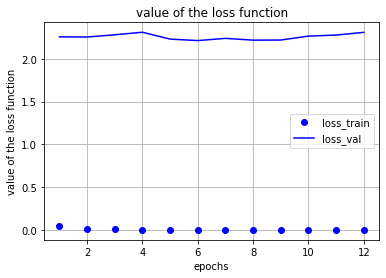

In [57]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

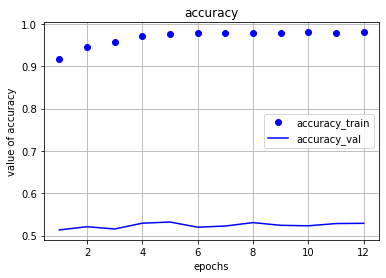

In [58]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='accuracy_train')
plt.plot(epochs, acc_val, 'b', label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Analyse Results</span></span></center></h1> 

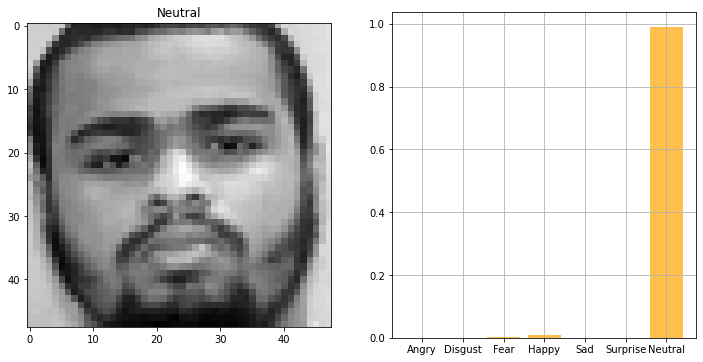

In [59]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 106)

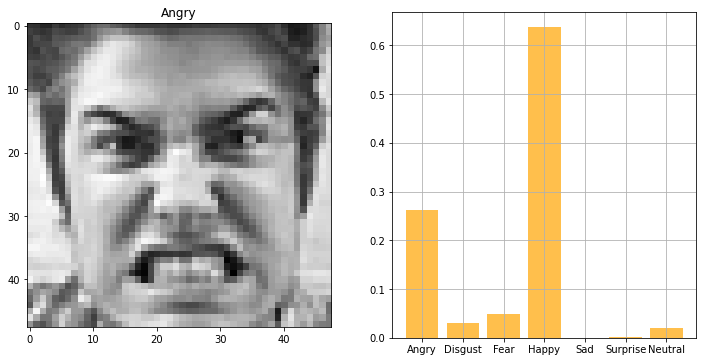

In [60]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 40)

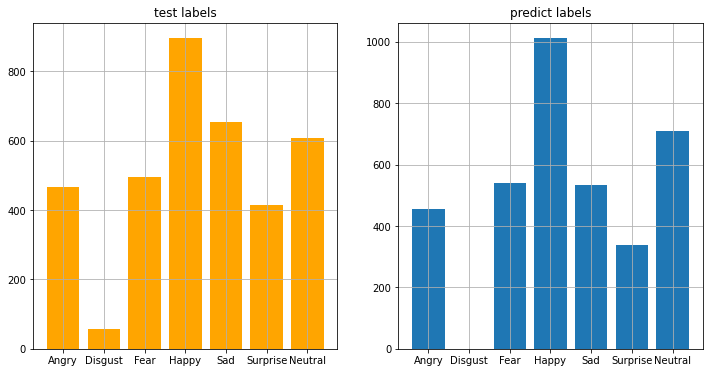

In [61]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Analyse Wrong Prediction</span></span></center></h1> 
The accuracy score is about 25% on the test set. So it is obvious to take focus on the wrong predictions. We want to extract details to improve the model.

In [62]:
df_compare = pd.DataFrame()
df_compare['real']  = test_labels.argmax(axis=1)
df_compare['pred']  = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

In [63]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))
conf_mat

array([[ 98,   0,  64, 101,  71,  29, 104],
       [  9,   0,  12,   8,  12,   4,  11],
       [ 66,   0, 107,  88,  81,  67,  87],
       [ 76,   0,  84, 527,  81,  17, 110],
       [111,   0, 104, 116, 152,  22, 148],
       [ 33,   0,  79,  53,  36, 167,  47],
       [ 63,   0,  91, 119, 102,  31, 201]], dtype=int64)

<ipython-input-64-45440dedc879>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


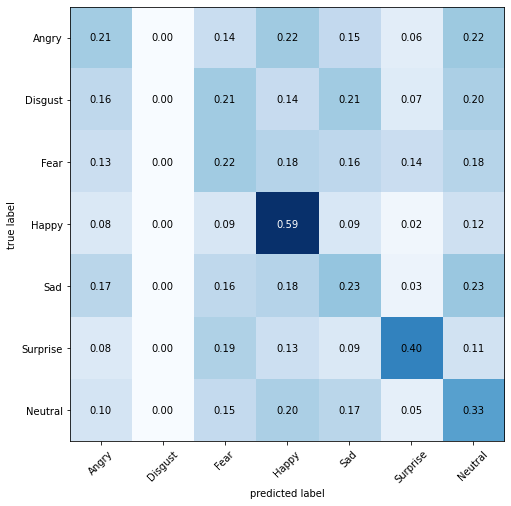

In [64]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

### save the notebook in html format

In [65]:
!jupyter nbconvert train.ipynb --to html

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | pattern 'train.ipynb' matched no files



    Write notebook output to stdout instead of files.
    Equivalent to: [--NbConvertApp.writer_class=StdoutWriter]
--inplace
    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)
    Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory=]
--clear-output
    Clear output of current file and save in place, 
    overwriting the existing notebook.
    Equivalent to: [--NbConvertApp.use_output_suffix=False --NbConvertApp.export_format=notebook --FilesWriter.build_directory= --ClearOutputPreprocessor.enabled=True]
--no-prompt
    Exclude input and output prompts from converted document.
    Equivalent to: [--TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True]
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
    Equivalent to: [--Templa

In [66]:
import datetime
now = datetime.datetime.now()
print(f"{now.strftime('%d-%m-%Y %H:%M:%S')}: Finished Successfully")


--template-file=<Unicode>
    Name of the template file to use
    Default: None
    Equivalent to: [--TemplateExporter.template_file]
--writer=<DottedObjectName>
    Writer class used to write the  results of the conversion
    Default: 'FilesWriter'
    Equivalent to: [--NbConvertApp.writer_class]
--post=<DottedOrNone>
    PostProcessor class used to write the results of the conversion
    Default: ''
    Equivalent to: [--NbConvertApp.postprocessor_class]
--output=<Unicode>
    overwrite base name use for output files. can only be used when converting
    one notebook at a time.
    Default: ''
    Equivalent to: [--NbConvertApp.output_base]
--output-dir=<Unicode>
    Directory to write output(s) to. Defaults to output to the directory of each
    notebook. To recover previous default behaviour (outputting to the current
    working directory) use . as the flag value.
    Default: ''
    Equivalent to: [--FilesWriter.build_directory]
--reveal-prefix=<Unicode>
    The URL prefix for